In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from fonction_tp_covid import *


dataframe = pd.read_excel('dataset.xlsx') 
data_numpy= dataframe.to_numpy() 


# on supprime la colonne d'index des targets car inutile et genante
data_numpy= np.delete(data_numpy,0,1)

label_info={}
titre=[]

# on recupere les noms des colonnes
for x in dataframe : 
    titre.append(x)
titre=np.delete(titre,0)

list_tag = {}
list_tag['data_numpy']=data_numpy.shape


In [87]:
#affichage_label(data_numpy,titre)   

In [88]:
data_numpy = encodage(data_numpy)

In [89]:
affiche_features(compteur_tableau(data_numpy,0,int),titre,data_numpy) 

5.9: Patient age quantile
89.3: Hematocrit
89.3: Hemoglobin
89.32: Platelets
89.32: Red blood Cells
89.32: Lymphocytes
89.32: Mean corpuscular hemoglobin concentration (MCHC)
89.32: Leukocytes
89.32: Basophils
89.32: Mean corpuscular hemoglobin (MCH)
89.32: Eosinophils
89.32: Mean corpuscular volume (MCV)
89.32: Red blood cell distribution width (RDW)
89.33: Monocytes
89.37: Mean platelet volume 
90.1: SARS-Cov-2 exam result
90.89: Neutrophils
91.02: Proteina C reativa mg/dL
92.47: Creatinine
92.95: Urea
93.27: Rhinovirus/Enterovirus
93.41: Potassium
93.43: Sodium
95.98: Aspartate transaminase
96.0: Alanine transaminase
96.3: Serum Glucose
96.76: Total Bilirubin
96.76: Direct Bilirubin
96.76: Indirect Bilirubin
97.27: Gamma-glutamyltransferase 
97.43: Alkaline phosphatase
97.57: pCO2 (venous blood gas analysis)
97.57: Hb saturation (venous blood gas analysis)
97.57: Base excess (venous blood gas analysis)
97.57: pO2 (venous blood gas analysis)
97.57: Total CO2 (venous blood gas analysi

In [90]:
data=data_numpy
data=suppr_col_vide(data,0.93)

In [91]:
affiche_features(compteur_tableau(data,0,int),titre,data) 

5.9: Patient age quantile
89.3: Patient addmited to semi-intensive unit (1=yes, 0=no)
89.3: Patient addmited to intensive care unit (1=yes, 0=no)
89.32: Hematocrit
89.32: Platelets
89.32: Mean platelet volume 
89.32: Red blood Cells
89.32: Lymphocytes
89.32: Mean corpuscular hemoglobin concentration (MCHC)
89.32: Leukocytes
89.32: Basophils
89.32: Mean corpuscular hemoglobin (MCH)
89.32: Mean corpuscular volume (MCV)
89.33: Eosinophils
89.37: Hemoglobin
90.1: SARS-Cov-2 exam result
90.89: Monocytes
91.02: Serum Glucose
92.47: Respiratory Syncytial Virus
92.95: Red blood cell distribution width (RDW)
98.58: Patient addmited to regular ward (1=yes, 0=no)


In [92]:
vide_data=compteur_tableau(data,0,int)
#affiche_lignes(data,sorted(vide_data['ligne']['info']),80,100)

In [93]:
data=suppr_lig_vide (data,0.95)
vide_data=compteur_tableau(data,0,int)
#affiche_lignes(data,sorted(vide_data['ligne']['info']))

list_tag['data']=data.shape

In [94]:
positif,negatif=separation_des_targets(data,5)
list_tag['positif']=positif.shape
list_tag['negatif']=negatif.shape

In [95]:
vide_positif=compteur_tableau(positif,0,int)
#affiche_lignes(positif,vide_positif['ligne']['info'])

In [96]:
vide_negatif=compteur_tableau(negatif,0,int)
#affiche_lignes(negatif,vide_negatif['ligne']['info'])

In [97]:
for x in list_tag:
    print(x,list_tag[x])

data_numpy (5644, 110)
data (1085, 21)
positif (13, 21)
negatif (1072, 21)


In [98]:
index=vide_data['colonne']['index']
for x in range(2,6):
    data=np.delete(data,2,1)
    index=np.delete(index,2)
    
data=np.delete(data,11,1) 
data=np.delete(data,10,1) 
index=np.delete(index,12)
index=np.delete(index,11)

data=np.delete(data,0,1) 
index=np.delete(index,0)
        

In [99]:
nbcol=data[1,:].size
target_stat={}
for cible in ['data','positif' ,'negatif'] : 
    for critere in ['sum','mean','var','std','ptp'] :        
        target_stat[cible+'_'+critere]=test_colonnes(eval(cible),critere)
        

for x in range(0,nbcol):
    nom=titre[index[x]]
    print(nom,'\n')
    for critere in ['sum','mean','var','std','ptp'] :         
        print(critere,
              round(target_stat['data'+'_'+critere][x]),
              round(target_stat['positif'+'_'+critere][x]),
              round(target_stat['negatif'+'_'+critere][x]))
    print('\n')
       

SARS-Cov-2 exam result 

sum 557 13 11576
mean 1 1 11
var 0 0 28
std 0 0 5
ptp 1 0 19


Hemoglobin 

sum 0 2 555
mean 0 0 1
var 1 0 0
std 1 0 0
ptp 6 1 1


Platelets 

sum 0 1 71
mean 0 0 0
var 1 0 0
std 1 0 0
ptp 8 1 1


Mean platelet volume  

sum 0 -8 8
mean 0 -1 0
var 1 1 1
std 1 1 1
ptp 6 2 7


Red blood Cells 

sum 0 -7 7
mean 0 -1 0
var 1 1 1
std 1 1 1
ptp 9 2 7


Lymphocytes 

sum 0 11 -11
mean 0 1 0
var 1 1 1
std 1 1 1
ptp 7 4 12


Mean corpuscular hemoglobin concentration (MCHC) 

sum 0 -10 10
mean 0 -1 0
var 1 1 1
std 1 1 1
ptp 12 3 6


Leukocytes 

sum 0 -2 2
mean 0 0 0
var 1 1 1
std 1 1 1
ptp 10 2 8


Basophils 

sum 0 -5 5
mean 0 0 0
var 1 1 1
std 1 1 1
ptp 9 4 6


Mean corpuscular hemoglobin (MCH) 

sum 0 4 -4
mean 0 0 0
var 1 1 1
std 1 1 1
ptp 9 5 8


Monocytes 

sum 0 15 -15
mean 0 1 0
var 0 2 1
std 1 1 1
ptp 6 4 7


Red blood cell distribution width (RDW) 

sum 0 -8 8
mean 0 -1 0
var 0 0 1
std 1 1 1
ptp 13 2 12


Serum Glucose 

sum 0 -9 9
mean 0 -1 0
var 0 0 1
std 1 

In [109]:
'''nbcol=data[1,:].size
for col in range(0,nbcol):
    plt.title(titre[col])
    plt.figure()
    sns.displot(negatif[:,col],label='negative',color='b',kind="kde")
    sns.displot(positif[:,col],label='positif',color='r',kind="kde")
    plt.legend()'''

'nbcol=data[1,:].size\nfor col in range(0,nbcol):\n    plt.title(titre[col])\n    plt.figure()\n    sns.displot(negatif[:,col],label=\'negative\',color=\'b\',kind="kde")\n    sns.displot(positif[:,col],label=\'positif\',color=\'r\',kind="kde")\n    plt.legend()'

In [101]:
newtitre=[]
for x in index:
    newtitre.append(titre[x])    
df=pd.DataFrame(data,columns=newtitre)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score,make_scorer
from sklearn.model_selection import train_test_split,learning_curve, cross_val_score,validation_curve, GridSearchCV

0.9301470588235294


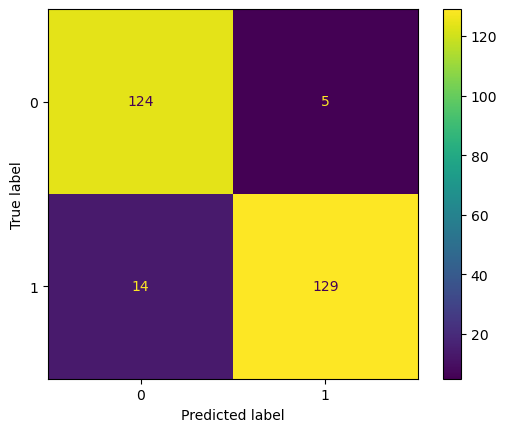

In [103]:
features=df.drop('SARS-Cov-2 exam result',axis=1,inplace=False)
target=df['SARS-Cov-2 exam result'].astype('int')

target_train,target_test,features_train,features_test=train_test_split(target,features)

robust_train=RobustScaler().fit_transform(features_train)
robust_test=RobustScaler().fit_transform(features_test)

model_forest=RandomForestClassifier(random_state=0)
model_forest.fit(robust_train,target_train.values.ravel())
print(model_forest.score(robust_test,target_test))
    
cm=confusion_matrix(target_test,model_forest.predict(robust_test),labels=model_forest.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_forest.classes_)
disp.plot()
plt.show()    


<function matplotlib.pyplot.show(close=None, block=None)>

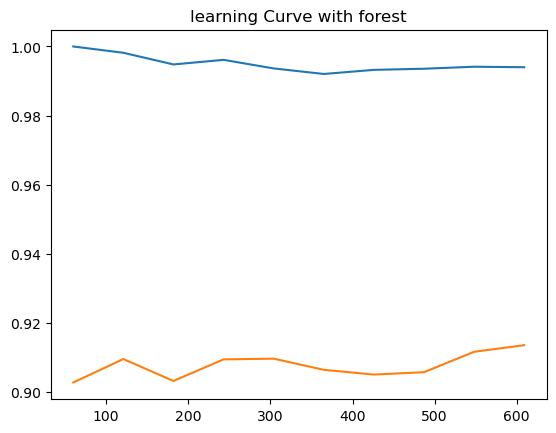

In [104]:
N,train_score,val_score= learning_curve(model_forest,robust_train,target_train.values.ravel(), cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
plt.figure()
plt.title("learning Curve with forest")
plt.plot(N,train_score.mean(axis=1),label='train score')
plt.plot(N,val_score.mean(axis=1),label='val score')
plt.show


<Axes: >

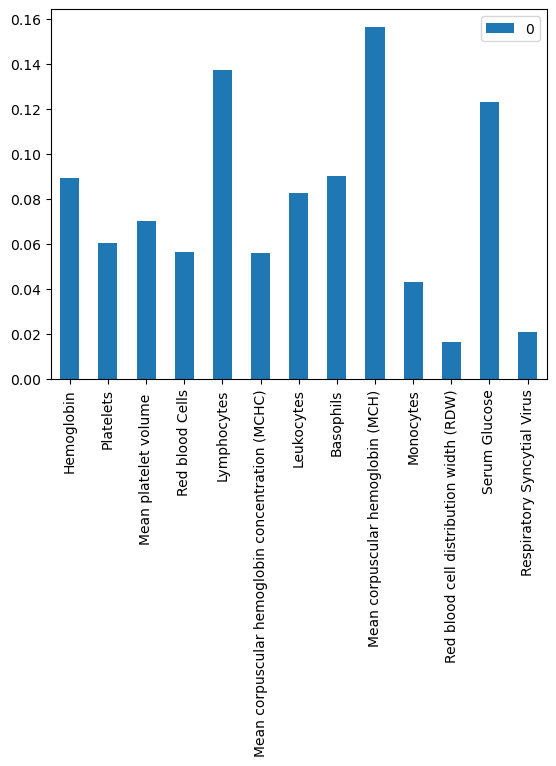

In [105]:
pd.DataFrame(model_forest.feature_importances_,index=features_train.columns).plot.bar()

In [106]:
metrique=['accuracy','f1','f1_macro','f1_micro','recall','recall_macro','recall_micro','precision','precision_macro','precision_micro',]
scoring_forest=[]
robust_train=RobustScaler().fit_transform(features_train)
for x in metrique : 
    y = cross_val_score(RandomForestClassifier(random_state=0),robust_train,target_train.values.ravel(),cv=5,scoring=x).mean()
    scoring_forest.append(y)

print('scoring_forest\n')
for x in range(len( scoring_forest)) :
    print(metrique[x],scoring_forest[x])
    

scoring_forest

accuracy 0.9139513746875709
f1 0.9087813177965979
f1_macro 0.9135795576423729
f1_micro 0.913951374687571
recall 0.8527181898325008
recall_macro 0.9150458037770098
recall_micro 0.9139513746875709
precision 0.9759068731019951
precision_macro 0.9218512067139653
precision_micro 0.9139513746875709


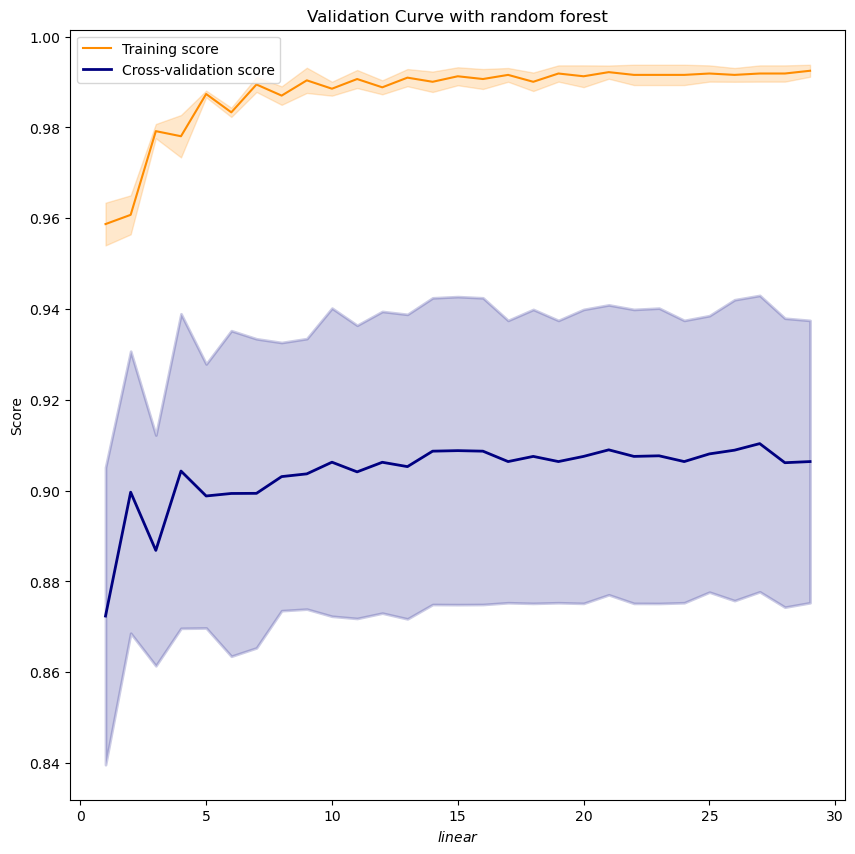

In [107]:
k=np.arange(1,30)
train_score,val_score=validation_curve(model_forest,
                                       robust_train,
                                       target_train,
                                       cv=5,scoring='f1',
                                       param_name='n_estimators',
                                       param_range=k)

plt.figure(figsize=(10,10))
plt.title("Validation Curve with random forest")
plt.xlabel(r"$linear$")
plt.ylabel("Score")

lw = 2
param_range=k
train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)
val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)
plt.plot(
    param_range, train_score_mean, label="Training score", color="darkorange", 
)
plt.fill_between(
    param_range,
    train_score_mean - train_score_std,
    train_score_mean + train_score_std,
    alpha=0.2,
    color="darkorange",
   # lw=lw,
)
plt.plot(
    param_range,val_score_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    val_score_mean - val_score_std,
    val_score_mean + val_score_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()


In [111]:
RandomForestClassifier.set_params

<function sklearn.base.BaseEstimator.set_params(self, **params)>

In [115]:
param_grid={'RandomForestClassifier': k,'metric':['f1','f1_macro','f1_micro','recall','recall_macro','recall_micro','precision','precision_macro','precision_micro']}
grid=GridSearchCV(RandomForestClassifier(random_state=0),param_grid ,cv =5,scoring='f1')
model=grid.estimator
model.fit(robust_train,target_train)
model.score(robust_test,target_test)


0.9301470588235294